In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as ts

from keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [8]:
(train_img, train_lab),(test_img,test_lab) = fashion_mnist.load_data()

In [9]:
train_img.shape

(60000, 28, 28)

In [10]:
train_img[54]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,  38,  67,
         77,  69,  72,  59,  25,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 131, 150, 103,
        111, 116, 128, 145, 157, 185, 146,  54,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  74, 111, 116, 172,
        173, 158, 163, 138,  97,  82,  70,  74,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   1,   0,  64, 103,  42, 109,
        123,  82,  65,  43,  40,  50,  75,  65,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 108, 202, 131, 123,
         57,  33,  47,  52,  62,  64,  81,  47,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,  48,  94, 106, 103,  69,
         75,  74,  69,  72,  86,  75, 118,  67,   0,   0,   1,   0,   0,
          0,   0],
       [  

In [11]:
train_lab[54]

np.uint8(2)

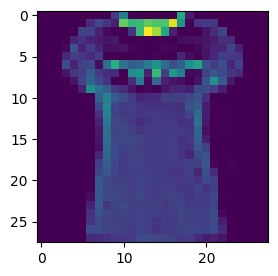

In [12]:
plt.figure(figsize=(3,3))
plt.imshow(train_img[34])
plt.show()

In [13]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
print(train_lab.shape)

(60000,)


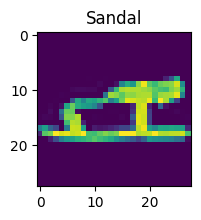

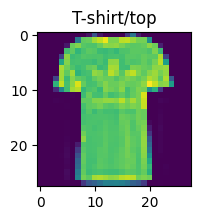

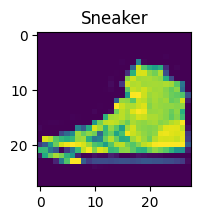

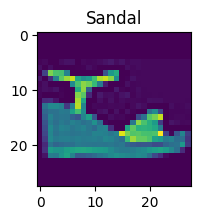

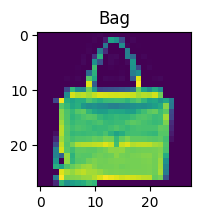

In [37]:
for i in range(5):
    ind = np.random.randint(60000)
    plt.figure(figsize=(2,2))
    plt.imshow(train_img[ind])
    plt.title(classes[train_lab[ind]])
    plt.show()

In [16]:
train_img.min()

np.uint8(0)

In [17]:
train_img.max()

np.uint8(255)

In [18]:
train_img[54]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03137255, 0.14901961, 0.2627451 , 0.30196078, 0.27058824,
        0.28235294, 0.23137255, 0.09803922, 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10588235,
        0.51372549, 0.58823529, 0.40392157, 0.43529412, 0.45490196,
        0.50196078, 0.56862745, 0.61568627, 0.7254902 , 0.57254902,
        0.21176471, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29019608,
        0.43529412, 0.45490196, 0.6745098 , 0.67843137, 0.61960784,
        0.63921569, 0.5411

In [19]:
train_img, test_img = train_img/255, test_img/255

In [20]:
train_img[342]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
test_img[123]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
    
])

C:\Users\Ruchita Kasture\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.fit(train_img, train_lab, epochs=30, batch_size=32, validation_data=(test_img, test_lab))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7857 - loss: 0.6169 - val_accuracy: 0.8519 - val_loss: 0.4209
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8604 - loss: 0.3858 - val_accuracy: 0.8677 - val_loss: 0.3719
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8776 - loss: 0.3354 - val_accuracy: 0.8684 - val_loss: 0.3681
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8890 - loss: 0.3060 - val_accuracy: 0.8735 - val_loss: 0.3473
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8923 - loss: 0.2889 - val_accuracy: 0.8736 - val_loss: 0.3507
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8974 - loss: 0.2785 - val_accuracy: 0.8713 - val_loss: 0.3605
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9030 - loss: 0.2637 - val_accuracy: 0.8834 - val_loss: 0.3311
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9037 - loss: 0

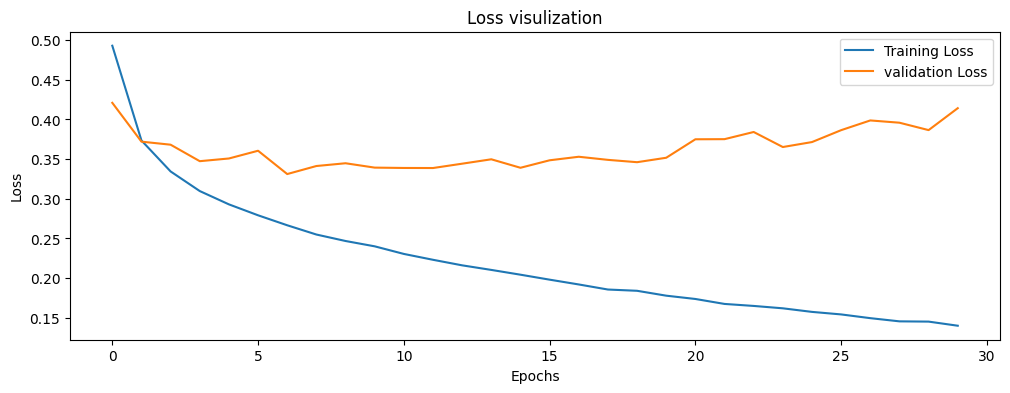

In [25]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label="Training Loss")
plt.plot(model.history.history["val_loss"],label="validation Loss")
plt.title("Loss visulization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

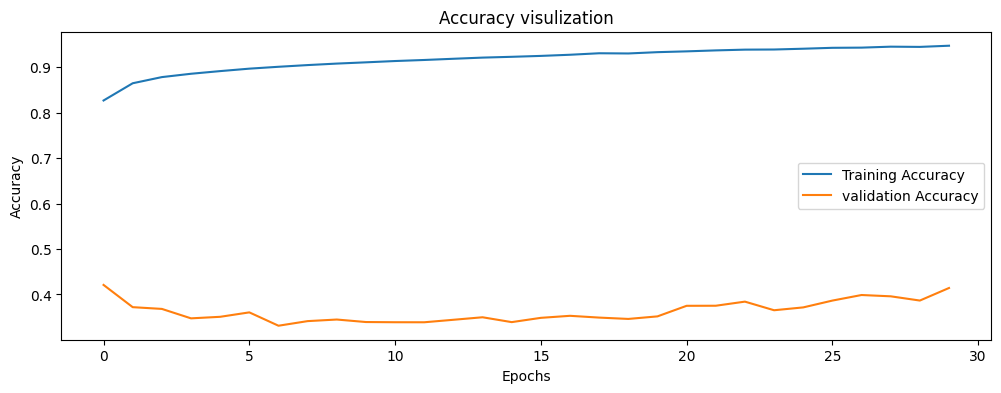

In [26]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.plot(model.history.history["val_loss"],label="validation Accuracy")
plt.title("Accuracy visulization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [38]:
def  image_prediction(img_path): 
    img = load_img(img_path , target_size=(28,28), color_mode='grayscale') # Load image in grayscale
    img_arr = img_to_array(img)
    img_norm = img_arr / 255.0
    img_flatten = np.expand_dims(img_norm, axis=0)
    pred = model.predict(img_flatten)
    predicted_class = classes[np.argmax(pred[0])]

    return predicted_class

In [39]:
image_prediction("Dress.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


'Bag'

In [40]:
image_prediction("Shoes.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


'Bag'

In [41]:
image_prediction("T-Shirt.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


'Bag'